## 1. Is this gray or full of color?

Whats the main difference between the images shown below?

![Image of coffee next to coins image](images/1.png)

In [1]:
from skimage import data
coffee_image = data.coffee()
coins_image = data.coins()

In [2]:
print(coffee_image.shape)
print(coins_image.shape)

(400, 600, 3)
(303, 384)


## 2. RGB to grayscale

In this exercise you will load an image from scikit-image module `data` and make it grayscale, then compare both of them in the output.

![Rocket](images/2.png)

In [3]:
rocket_image = data.rocket()

In [4]:
from skimage import color
grayscale_rocket_image = color.rgb2gray(rocket_image)

In [5]:
import matplotlib.pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(8, 12))
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

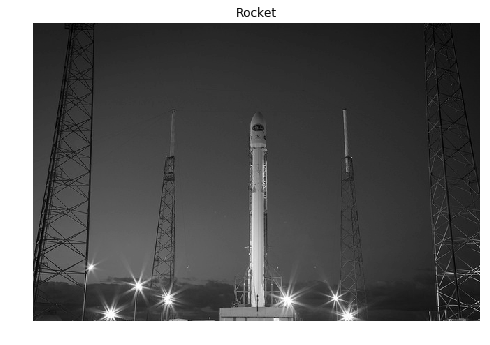

In [6]:
show_image(grayscale_rocket_image, 'Rocket')

## 3. Flipping out

As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

![City of Seville upside-down](images/3.jpg)


In [7]:
from skimage import io
seville_image = io.imread('images/3.jpg')

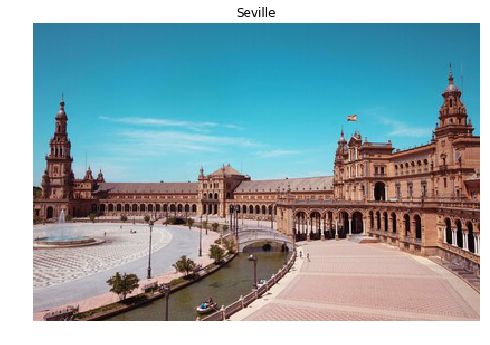

In [8]:
import numpy as np
seville_image_ud = np.flipud(seville_image)
seville_image_ud_lr = np.fliplr(seville_image_ud)
show_image(seville_image_ud_lr, 'Seville')

## 4. Histograms

In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:

![Woman smiling](images/4.jpg)

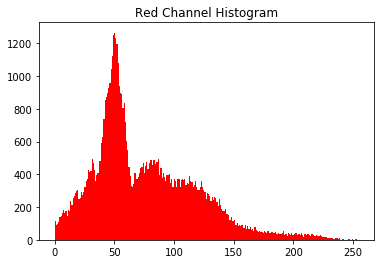

In [9]:
woman_smiling_image = io.imread('images/4.jpg')
woman_smiling_red_channel = woman_smiling_image[:, :, 0]
plt.hist(woman_smiling_red_channel.ravel(), bins=256, color='r')
plt.title('Red Channel Histogram');

## 5. Apply global thresholding

In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using `threshold_otsu()` and apply it to the image.

You'll see the resulting binarized image when using the `show_image()` function, previously explained.

![Chess pieces](images/5.jpg)

In [10]:
chess_image = io.imread('images/5.jpg')

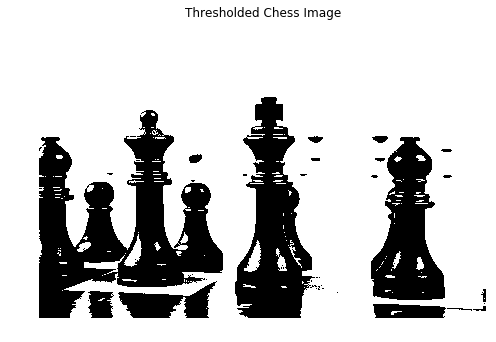

In [11]:
from skimage import filters
thresh = filters.threshold_otsu(chess_image)
binary_chess_image = 255 * (chess_image > thresh)
show_image(binary_chess_image, 'Thresholded Chess Image')

## 6. When the background isn't that obvious

Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.

![Page with text](images/6.png)

In [12]:
text_image = color.rgb2gray(io.imread('images/6.png'))

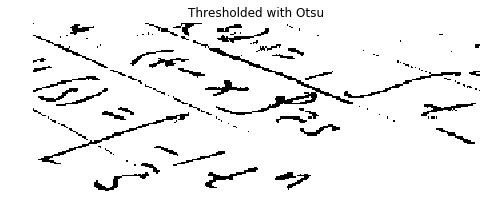

In [13]:
otsu_thresh = filters.threshold_otsu(text_image)
otsu_binary_text_image = 255 * (text_image > otsu_thresh)
show_image(otsu_binary_text_image, 'Thresholded with Otsu');

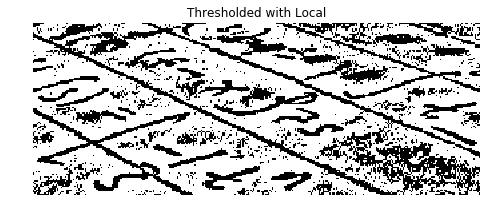

In [14]:
local_thresh = filters.threshold_local(text_image, block_size=35)
local_binary_text_image = 255 * (text_image > local_thresh)
show_image(local_binary_text_image, 'Thresholded with Local');

## 7. Trying other methods

As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different **global** thresholding methods.

![Forest fruits](images/7.jpg)

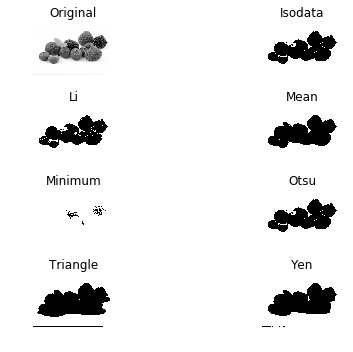

In [15]:
fruits_image = io.imread('images/7.jpg')
grayscale_fruits_image = color.rgb2gray(fruits_image)
fig, ax = filters.try_all_threshold(grayscale_fruits_image, verbose=False)
plt.show();

## 8. Apply thresholding

In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

![Several tools for handcraft art](images/8.jpg)

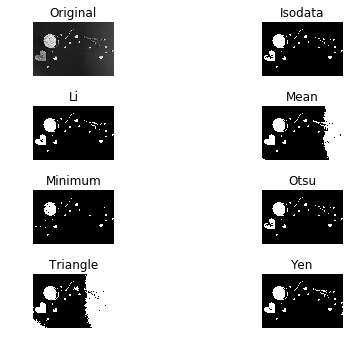

In [16]:
tools_image = io.imread('images/8.jpg')
grayscale_tools_image = color.rgb2gray(tools_image)
fig, ax = filters.try_all_threshold(grayscale_tools_image, verbose=False)
plt.show();

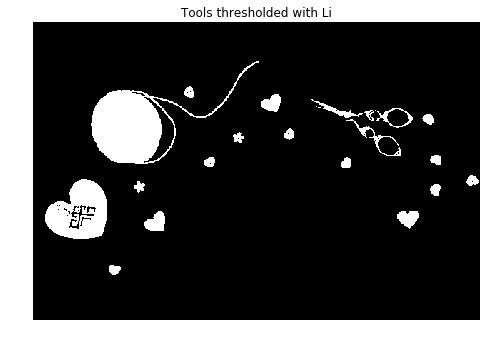

In [17]:
li_thresh = filters.threshold_li(grayscale_tools_image)
binary_tools_image = 255 * (grayscale_tools_image > li_thresh)
show_image(binary_tools_image, 'Tools thresholded with Li')